### Proyek Analisis Data: Bike Sharing Dataset

- Nama        : Dzul Fikri
- Email       : dzulfikri628@gmail.com
- ID Dicoding : fikridzul

### Menentukan Pertanyaan Bisnis

- Pada jam dan hari apa jumlah penggunaan rental sepeda paling padat?
- Bagaimana Faktor Cuaca dan Suhu mempengaruhi tingkat penggunaan sepeda?

### Import Semua Packages/Library yang Digunakan

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Data Wrangling

#### Gathering Data

In [143]:
# Load tabel day
day_df = pd.read_csv("data/day.csv")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [144]:
# Load tabel hour
hour_df = pd.read_csv("data/hour.csv")
hour_df.head(26)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight**
- Tabel Pertama adalah **day.csv** merupakan tabel yang menyajikan data rental sepeda dalam setiap hari, dimana terdapat beberapa variabel seperti, dteday(tanggal), season(musim), yr(tahun), mnth(bulan), holiday(hari libur), weekday(hari dalam seminggu), workingday(hari kerja)m weathersit(cuaca), temp(suhu), atemp ,hum(kelebapan), windspeed(kecepatan angin), casual(Pengguna Biasa), registered(pengguna yang terdaftar), cnt(jumlah pengguna casual & registered)
- Untuk Tabel Kedua yakni **hour.csv** memiliki variabel yang sama dengan tabel pertama, yang membedakan hanyalah terdapat tambahan variabel hr(jam) pada tabel hour


#### Assessing Data

In [145]:
# Assessing day_df
# using info() to shows data type 
day_df.info()

# isna() to show missing values
day_df.isna().sum()

# duplicated() to show duplicate data
print("Jumlah Duplikasi: ", day_df.duplicated().sum())
#day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah Duplikasi:  0


In [146]:
# Assesing hour_df
# show data types
hour_df.info()

# show missing values
hour_df.isna().sum()

# show duplicated data
print("Jumlah Duplikasi: ", hour_df.duplicated().sum())

hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah Duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**
- Setelah melihat informasi data "day_df" & "hour_df", diketahui bahwa terdapat data dengan tipe data yang salah yakni pada kolom 'dteday' yang memiliki tipe data object(digunakan untuk string) dan seharusnya bertipe data **datetime** karena pada kolom tersebut menampilkan data waktu. 
- Tidak terdapat Missing Values pada kedua tabel.
- Tidak terdapat data duplikat di kedua tabel

#### Cleaning Data

In [147]:
# Cleaning Data day_df
datetimes_column = ["dteday"]

for column in datetimes_column:
    day_df[column] = pd.to_datetime(day_df[column])


day_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight**
- tipe data 'dteday' telah berubah menjadi datetime

In [148]:
# mapping weekday
day_map = {0:'Sunday', 1:'Monday', 2: 'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
day_df['weekday'] = day_df['weekday'].map(day_map)

# mapping season
season_map = {1:'Springer', 2:'Summer', 3:'Fall', 4:'Winter'}
day_df['season'] = day_df['season'].map(season_map)

# Mapping weathersit
weather_map = {1:'Clear', 2:'Mist & Cloudy', 3:'Light Snow & Rain', 4:'Heavy Rain & Thunderstorm'}
day_df['weathersit'] = day_df['weathersit'].map(weather_map)

# Mapping mnth
month_map = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
day_df['mnth'] = day_df['mnth'].map(month_map)

# Mapping yr
year_map = {0:'2011',1:'2012'}
day_df['yr'] = day_df['yr'].map(year_map)

day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,0,Saturday,0,Mist & Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,January,0,Sunday,0,Mist & Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,January,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,January,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight**
- Mengubah data weekday dari 0-6 menjadi Sunday-Saturday
- Mengubah data season dari 1-4 menjadi Springer, Summer, Fall & Winter
- Mengubah data weathersit dari 1-4 menjadi Clear, Mist & Cloudy, Light Snow & Rain, Heavy Rain & Thunderstorm
- Mengubah data mnth dari 1-12 menjadi January - December
- Mengubah data yr dari 0 & 1 menjadi 2011 & 2012

In [149]:
# Cleaning Data hour_df
datetimes_column_hour = ["dteday"]

for column in datetimes_column_hour:
    hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight**
- Tipe data pada kolom 'dteday' telah berubah menjadi datetime


In [150]:
# mapping weekday
day_map = {0:'Sunday', 1:'Monday', 2: 'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
hour_df['weekday'] = hour_df['weekday'].map(day_map)

# mapping season
season_map = {1:'Springer', 2:'Summer', 3:'Fall', 4:'Winter'}
hour_df['season'] = hour_df['season'].map(season_map)

# Mapping weathersit
weather_map = {1:'Clear', 2:'Mist & Cloudy', 3:'Light Snow & Rain', 4:'Heavy Rain & Thunderstorm'}
hour_df['weathersit'] = hour_df['weathersit'].map(weather_map)

# Mapping mnth
month_map = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
hour_df['mnth'] = hour_df['mnth'].map(month_map)

# Mapping yr
year_map = {0:'2011',1:'2012'}
hour_df['yr'] = hour_df['yr'].map(year_map)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight**
- Mengubah data weekday dari 0-6 menjadi Sunday-Saturday
- Mengubah data season dari 1-4 menjadi Springer, Summer, Fall & Winter
- Mengubah data weathersit dari 1-4 menjadi Clear, Mist & Cloudy, Light Snow & Rain, Heavy Rain & Thunderstorm
- Mengubah data mnth dari 1-12 menjadi January - December
- Mengubah data yr dari 0 & 1 menjadi 2011 & 2012

### Exploratory Data Analysis (EDA)

#### Exploring Data by Weekday

In [151]:
# Exploring data day_df
day_df.describe(include="all")

# Show Total bike rental user(registered & casual) by Season
day_df.groupby(by="weekday").cnt.sum().sort_values(ascending=False).reset_index()

,weekday,cnt
0,Friday,487790
1,Thursday,485395
2,Saturday,477807
3,Wednesday,473048
4,Tuesday,469109
5,Monday,455503
6,Sunday,444027


**Insight**
- Jumlah Tertinggi penyewa sepeda terdapat pada hari Jum'at

#### Exploring Data by Hour

In [152]:
hour_df.describe(include="all")

# Show Total bike rental user by hours 
hour_df.groupby(by="hr").cnt.sum().sort_values(ascending=False).reset_index()

,hr,cnt
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


**Insight**
- Jumlah pengguna rental sepeda tertinggi pada jam 17 / 5 sore

#### Explore Data by Season

In [153]:

day_df.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index()



,season,cnt
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Springer,471348


**Insight**
- Musim Fall (Semi) merupakan musim dengan jumlah pengguna rental sepeda tertinggi

#### Explore Data by Weathersit

In [154]:
day_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False).reset_index()


,weathersit,cnt
0,Clear,2257952
1,Mist & Cloudy,996858
2,Light Snow & Rain,37869


**Insight**
- Cuaca Cerah merupakan puncak jumlah pengguna rental sepeda

#### Explore Data by Month & Year

In [155]:
day_df.groupby(by=["mnth","yr"]).cnt.sum().sort_values(ascending=False).reset_index()

,mnth,yr,cnt
0,September,2012,218573
1,August,2012,214503
2,July,2012,203607
3,June,2012,202830
4,October,2012,198841
5,May,2012,195865
6,April,2012,174224
7,March,2012,164875
8,November,2012,152664
9,June,2011,143512


**Insight**
- Jumlah Pengguna tertinggi dalam rentang tahun 2011 - 2012 berada pada bulan 9(September) tahun 2012

#### Explore Data by User

In [156]:
count_all_user = day_df['cnt'].sum()
count_casual_user = day_df['casual'].sum()
count_registered_user = day_df['registered'].sum()

print("Total All User: ",count_all_user)
print("Total Casual User: ",count_casual_user)
print("Total Registered User: ",count_registered_user)

Total All User:  3292679
Total Casual User:  620017
Total Registered User:  2672662


In [169]:
hour_df.to_csv("main_data.csv",index=False)

### Visualization & Explanatory Analysis

#### Pertanyaan 1 : Pada jam dan hari apa jumlah penggunaan rental sepeda paling padat?

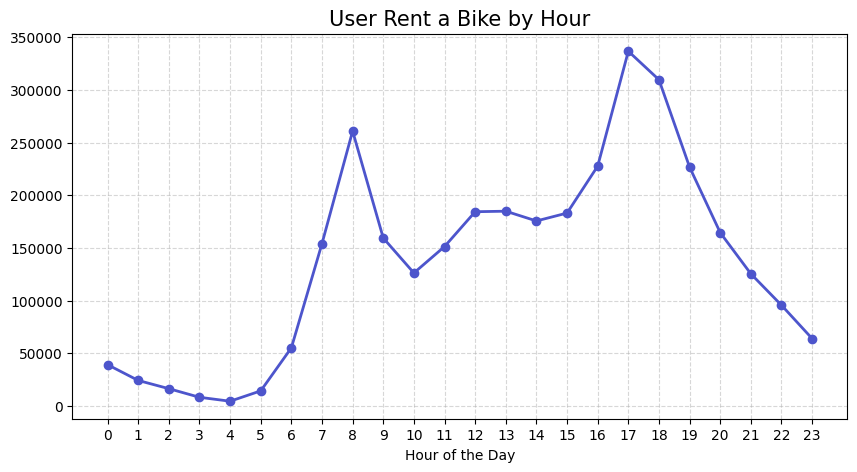

In [161]:
# Rent a bike by hour
by_hour = hour_df.groupby(by='hr').cnt.sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(
    by_hour["hr"],
    by_hour["cnt"],
    marker='o', 
    linewidth=2,
    color="#4D55CC"
)
plt.title("User Rent a Bike by Hour", loc="center", fontsize=15)
plt.xlabel("Hour of the Day")
plt.xticks(by_hour['hr'], fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

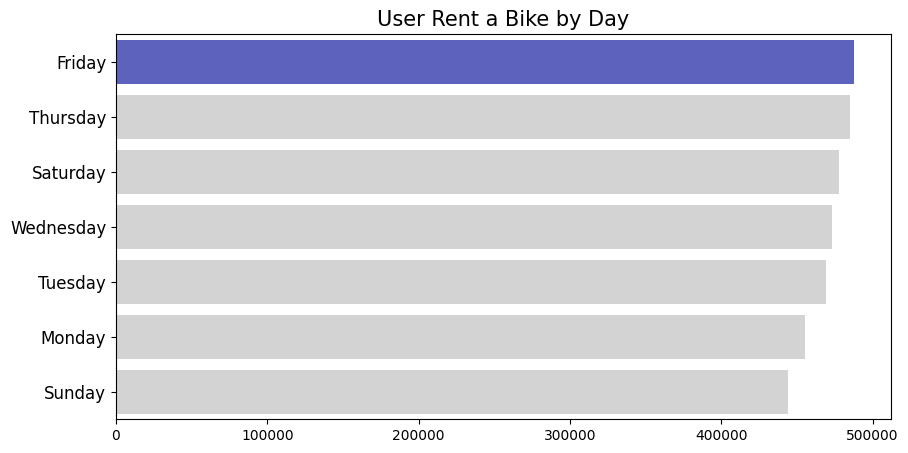

In [168]:
by_day = day_df.groupby(by='weekday').cnt.sum().reset_index()

plt.figure(figsize=(10, 5))
 
sns.barplot(
    y="weekday", 
    x="cnt",
    data=by_day.sort_values(by="cnt", ascending=False),
    palette=["#4D55CC", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"],
    hue='weekday'
)
plt.title("User Rent a Bike by Day", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight**
- Dapat diketahui bahwa jumlah penyewa sepeda bersifat fluktuatif, dimana dipagi hari mencapai puncak penyewa pada jam 8 pagi lalu turun dan akan mencapai puncak tertinggi pada jam 5 sore dan akan kembali turun.
- Hari Jum'at merupakan hari dimana jumalh penyewa berada pada nilai tertinggi meskipun selisih dengan hari-hari yang lain tidak terlalu besar.

#### Pertanyaan 2: Bagaimana Faktor Cuaca mempengaruhi tingkat penggunaan rental sepeda?

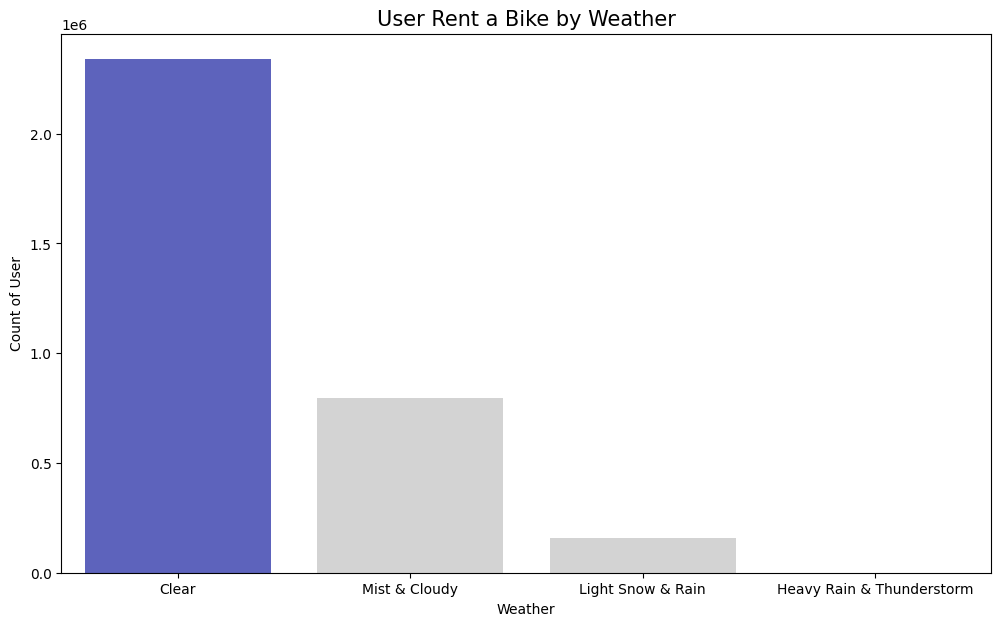

In [165]:
by_hour = hour_df.groupby(by='weathersit').cnt.sum().reset_index()

plt.figure(figsize=(12, 7))
 
sns.barplot(
    y="cnt", 
    x="weathersit",
    data=by_hour.sort_values(by="cnt", ascending=False),
    palette=["#4D55CC", "#D3D3D3", "#D3D3D3", "#D3D3D3"],
    hue='weathersit'
)
plt.title("User Rent a Bike by Weather", loc="center", fontsize=15)
plt.ylabel("Count of User")
plt.xlabel("Weather")
plt.show()

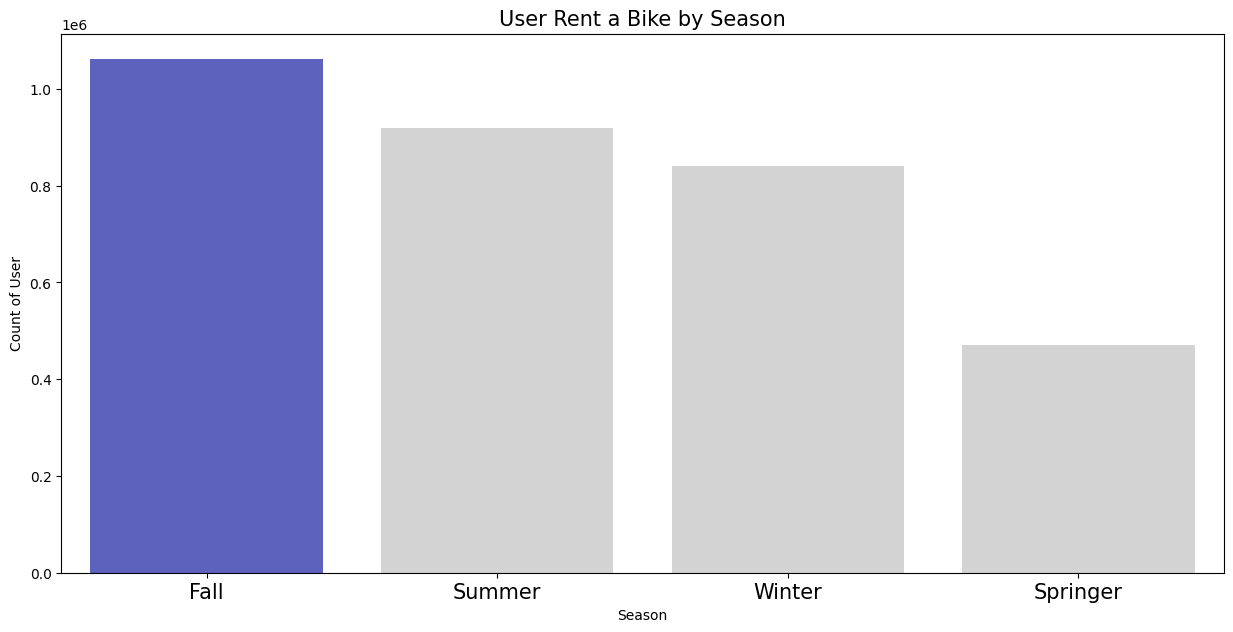

In [166]:
by_day = day_df.groupby(by='season').cnt.sum().reset_index()

plt.figure(figsize=(15, 7))
 
sns.barplot(
    y="cnt", 
    x="season",
    data=by_day.sort_values(by="cnt", ascending=False),
    palette=["#4D55CC", "#D3D3D3", "#D3D3D3", "#D3D3D3"],
    hue='season'
)
plt.title("User Rent a Bike by Season", loc="center", fontsize=15)
plt.ylabel("Count of User")
plt.xlabel("Season")

plt.tick_params(axis='x', labelsize=15)
plt.show()

**Insight**
- Nilai tertinggi dalam penyewaan sepeda berdasarkan cuaca ialah ketika sedang cerah
- Musim Gugur(Fall) merupakan musim paling ramai pengguna menyewa sepeda

### Conclusion

1. Pengguna menyewa sepeda dalam satu hari mengalami fluktuatif dimana, penyewa akan meningkat pada jam 8 pagi lalu menurun hingga akan naik pada jumlah tertingginya pada jam 5 sore. Ini berkaitan pada jam kerja 9-5 di amerika serikat pada waktu itu, sehingga penggunaaan sepeda rental akan meningkat saat jam keberangkatan dan jam kepulangan kantor.

2. Cuaca sangat berpengaruh dalam jumlah penyewa sepeda, para penyewa cenderung menyewa sebuah sepeda ketika cuaca sedang keadaan cerah, dan akan turun jauh apabila cuaca berawan-mendung dan bahkan tidak ada penyewa ketika cuaca sedang Hujan Deras dan Badai. Pada musim gugur pula jumlah penyewa sepeda beada pada tingkat tertingginya dibandingkan dengan musim-musim yang lain, dimana pada musim tersebut cenderung memiliki cuaca yang bersahabat.
